# Artificial Neural Networks and Deep Learning

---

## Homework 2: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 2` in your Google Drive.
2. Upload the `mars_for_students.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 2 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.csv` file to Kaggle.

## ⚙️ Import Libraries

In [1]:
import os
from datetime import datetime

import numpy as np
import pandas as pd
from tensorflow.keras.saving import register_keras_serializable

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tfk.__version__}")
print(f"GPU devices: {len(tf.config.list_physical_devices('GPU'))}")

TensorFlow version: 2.16.1
Keras version: 3.3.3
GPU devices: 1


## ⏳ Load the Data

In [2]:
data = np.load("/kaggle/input/ann2dl/mars_for_students.npz")

training_set = data["training_set"]
X = training_set[:, 0]
y = training_set[:, 1]

X_test = data["test_set"]

print(f"Training X_train shape: {X.shape}")
print(f"Training y_train shape: {y.shape}")
print(f"Test X_test shape: {X_test.shape}")

Training X_train shape: (2615, 64, 128)
Training y_train shape: (2615, 64, 128)
Test X_test shape: (10022, 64, 128)


In [3]:
category_map = {
    0: 0, # Background
    1: 1, # Soil
    2: 2, # Bedrock
    3: 3, # Sand
    4: 4, # Big Rock
}

## Data preprocessing

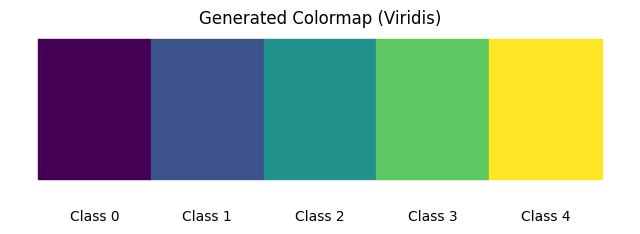

In [4]:
def create_segmentation_colormap(num_classes):
    """
    Create a linear colormap using a predefined palette.
    Uses 'viridis' as default because it is perceptually uniform
    and works well for colorblindness.
    """
    return plt.cm.viridis(np.linspace(0, 1, num_classes))

#create my own colormap 
num_classes = 5
colormap = create_segmentation_colormap(num_classes)

# Visualize the colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(colormap):
    plt.fill_between([i, i+1], 0, 1, color=color)
    plt.text(i + 0.5, -0.3, f"Class {i}", ha='center')
plt.axis("off")
plt.title("Generated Colormap (Viridis)")
plt.show()


def apply_colormap(label, colormap=colormap):
    """
    Apply the colormap to a label.
    """
    # Ensure label is 2D
    label = np.squeeze(label)

    if colormap is None:
        num_classes = len(np.unique(label))
        colormap = create_segmentation_colormap(num_classes)

    # Apply the colormap
    colored = colormap[label.astype(int)]

    #print(colormap)
    return colored

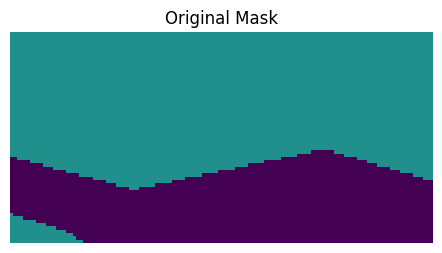

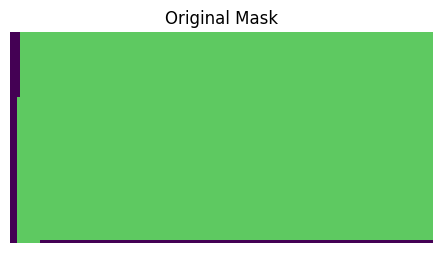

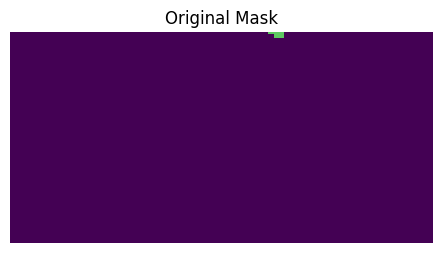

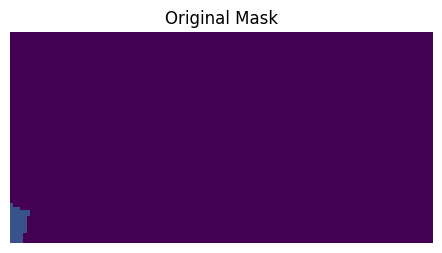

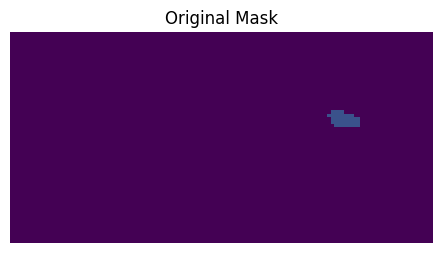

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress tracking

# Visualize some samples
for i in range(5):  # Show the first 5 masks
    plt.figure(figsize=(12, 4))

    # Original mask
    plt.subplot(1, 2, 1)
    plt.imshow(colormap[y[i].astype(int)] , cmap='gray')
    plt.title("Original Mask")
    plt.axis("off")

    plt.show()

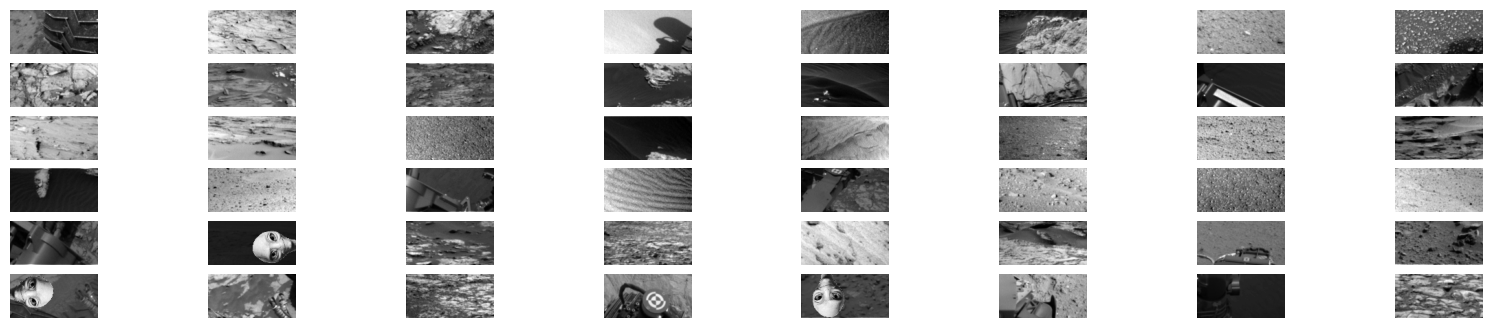

In [6]:
# plot the first 10 and last 10 images of the training set
fig, axs = plt.subplots(6, 8, figsize=(20, 4))
axs = axs.reshape(-1)
for i in range(48):
    axs[i].imshow(X[-i-210], cmap="gray")
    axs[i].axis("off")
plt.show()

We are not alone in the universe



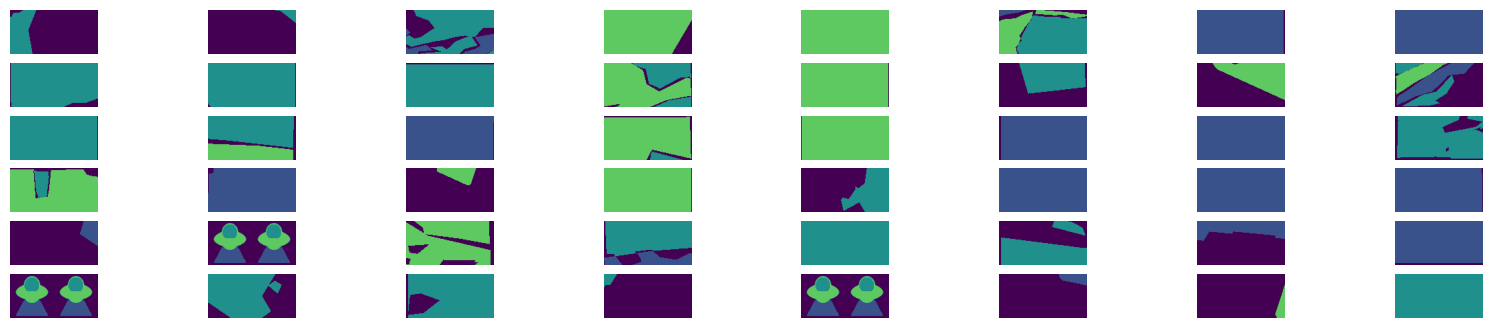

In [7]:
# plot the first 10 and last 10 images of the training set
fig, axs = plt.subplots(6, 8, figsize=(20, 4))
axs = axs.reshape(-1)
for i in range(48):
    axs[i].imshow(colormap[y[-i-210].astype(int)]) #, cmap="gray")
    axs[i].axis("off")
plt.show()

2.0
[[0. 0. 2. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


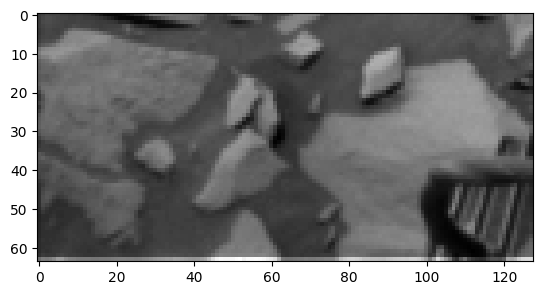

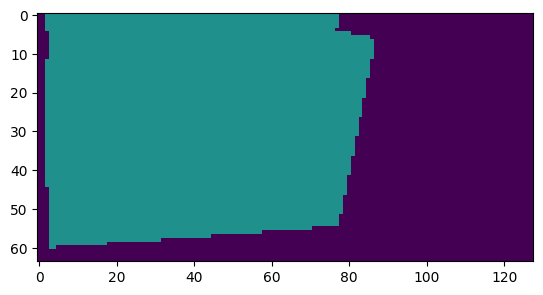

In [8]:
bo = X[-181]
mask_bo = y[-181]

plt.figure()
plt.imshow(bo, cmap='gray')
plt.figure()
plt.imshow(colormap[mask_bo.astype(int)])
print(mask_bo[20, 30])
print(mask_bo)

But we notice that aliens all have the same mask

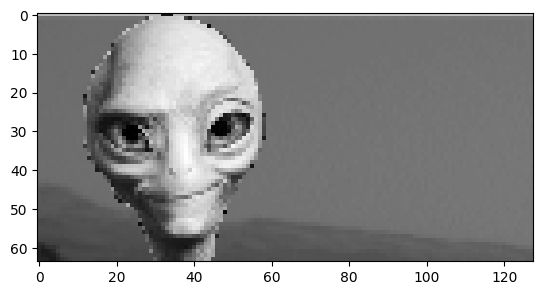

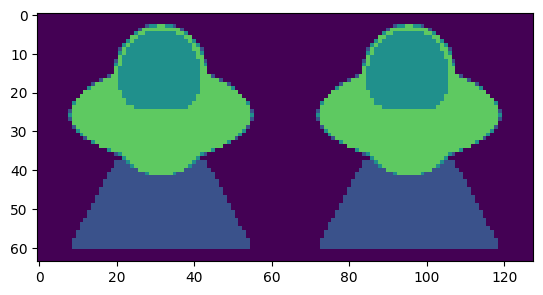

In [9]:
alien = X[-1]
mask_alien = y[-1]

plt.figure()
plt.imshow(alien, cmap='gray')
plt.figure()
plt.imshow(colormap[mask_alien.astype(int)], cmap='gray')

we are going to remove the aliens from our dataset

In [10]:
filter_mask = np.array([np.array_equal(yarr, mask_alien) for yarr in y])
filter_mask.shape

(2615,)

In [11]:
X = X[filter_mask == False]
y = y[filter_mask == False]

print(X.shape, y.shape)

(2505, 64, 128) (2505, 64, 128)


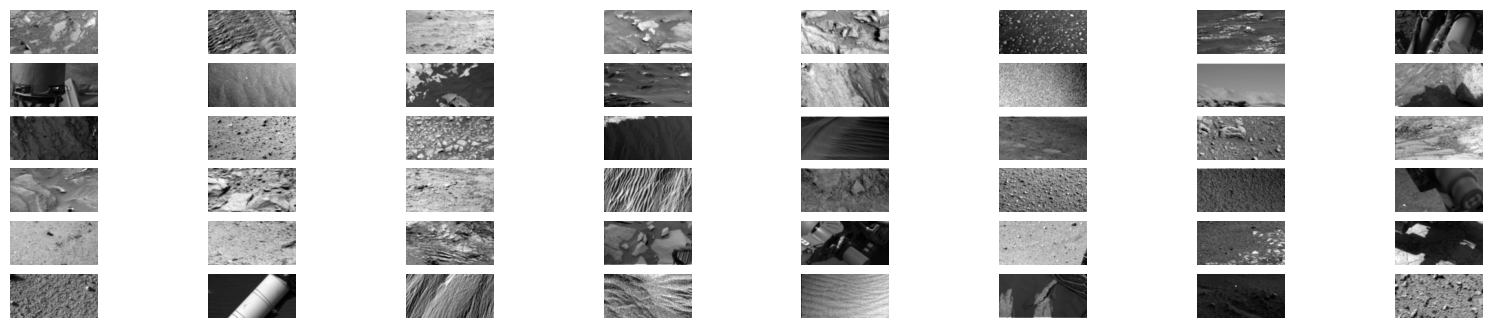

In [12]:
# plot the first 10 and last 10 images of the training set
fig, axs = plt.subplots(6, 8, figsize=(20, 4))
axs = axs.reshape(-1)
for i in range(48):
    axs[i].imshow(X[-i-140], cmap="gray")
    axs[i].axis("off")
plt.show()

3.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 3. 3. 3.]
 [0. 0. 0. ... 3. 3. 3.]
 [0. 0. 0. ... 3. 3. 3.]]


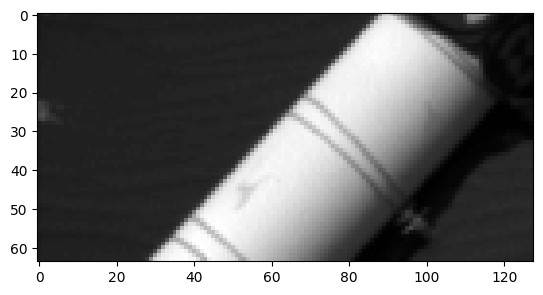

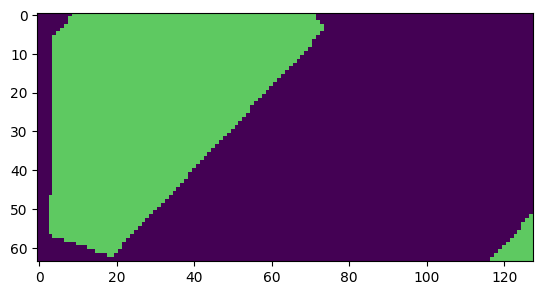

In [13]:
bo = X[-181]
mask_bo = y[-181]

plt.figure()
plt.imshow(bo, cmap='gray')
plt.figure()
plt.imshow(colormap[mask_bo.astype(int)])
print(mask_bo[20, 30])
print(mask_bo)

## Split dataset 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalization 

In [15]:
# Add color channel and rescale pixels between 0 and 1
X_train = X_train[..., np.newaxis] / 255.0
X_valid = X_valid[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0

input_shape = X_train.shape[1:]

num_classes = len(np.unique(y_train))

print(f"Input shape: {input_shape}")
print(f"Number of classes: {num_classes}")
print("num samples in training set: ", X_train.shape[0])

Input shape: (64, 128, 1)
Number of classes: 5
num samples in training set:  2004


[[2. 2. 2. ... 0. 0. 0.]
 [2. 2. 2. ... 0. 0. 0.]
 [2. 2. 2. ... 2. 2. 0.]
 ...
 [2. 2. 2. ... 2. 2. 0.]
 [2. 2. 2. ... 2. 2. 0.]
 [2. 2. 2. ... 2. 2. 0.]]


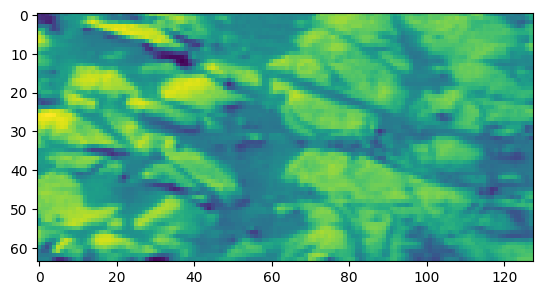

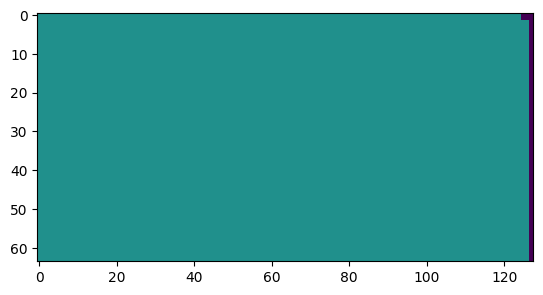

In [16]:
plt.figure()
plt.imshow(X_valid[0]) #, cmap='gray')
plt.figure()
plt.imshow(colormap[y_valid[0].astype(int)])
print(y_valid[0]) 

[[1. 1. 1. ... 3. 3. 3.]
 [1. 1. 1. ... 3. 3. 3.]
 [1. 1. 1. ... 3. 3. 3.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 1. 1. ... 1. 1. 1.]
 [0. 1. 1. ... 1. 1. 1.]]


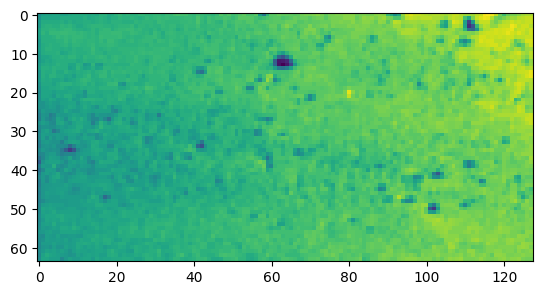

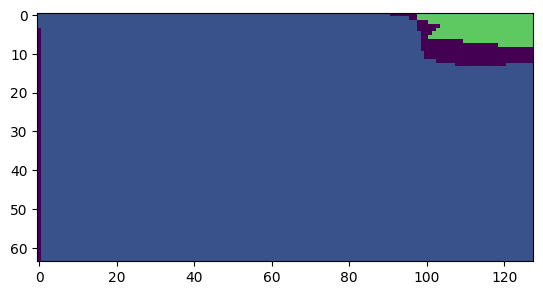

In [17]:
plt.figure()
plt.imshow(X_train[21]) #, cmap='gray')
plt.figure()
plt.imshow(colormap[y_train[21].astype(int)])
print(y_train[21])                    

### Data augmentation

In [18]:
import cv2

def rotate_image_and_label(image, label, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    rotated_image = cv2.warpAffine(
        image,
        rotation_matrix,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_REFLECT_101
    )

    rotated_label = cv2.warpAffine(
        label,
        rotation_matrix,
        (w, h),
        flags=cv2.INTER_NEAREST,
        borderMode=cv2.BORDER_REFLECT_101
    )

    return rotated_image, rotated_label

def shear_image_and_label(image, label, shear_range):
    h, w = image.shape[:2]
    shear_x = np.random.uniform(-shear_range, shear_range)
    shear_y = np.random.uniform(-shear_range, shear_range)

    shear_matrix = np.array([[1, shear_x, 0],
                             [shear_y, 1, 0]], dtype=np.float32)

    sheared_image = cv2.warpAffine(
        image,
        shear_matrix,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_REFLECT_101
    )

    sheared_label = cv2.warpAffine(
        label,
        shear_matrix,
        (w, h),
        flags=cv2.INTER_NEAREST,
        borderMode=cv2.BORDER_REFLECT_101
    )

    return sheared_image, sheared_label

def apply_brightness(image, brightness_factor):
    return np.clip(image * brightness_factor, 0, 1).astype(np.double)

def apply_gaussian_noise(image, std_dev):
    # Genera rumore gaussiano
    noise = np.random.normal(0, std_dev, image.shape).astype(np.float32)  
    # Aggiungi il rumore all'immagine
    noisy_image = image.astype(np.float32) + noise   
    # Clippa i valori per rimanere nell'intervallo [0, 1]
    noisy_image = np.clip(noisy_image, 0, 1)
    # Converti l'immagine al tipo di dato originale
    return noisy_image.astype(image.dtype)

def zoom_image_and_label(image, label, zoom_factor):
    h, w = image.shape[:2]
    new_h, new_w = int(h * zoom_factor), int(w * zoom_factor)
    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    resized_label = cv2.resize(label, (new_w, new_h), interpolation=cv2.INTER_NEAREST)

    if zoom_factor < 1.0:
        pad_h = (h - new_h) // 2
        pad_w = (w - new_w) // 2
        image_padded = cv2.copyMakeBorder(resized_image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REFLECT_101)
        label_padded = cv2.copyMakeBorder(resized_label, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REFLECT_101)
        return image_padded[:h, :w], label_padded[:h, :w]
    else:
        crop_h = (new_h - h) // 2
        crop_w = (new_w - w) // 2
        return resized_image[crop_h:crop_h+h, crop_w:crop_w+w], resized_label[crop_h:crop_h+h, crop_w:crop_w+w]


In [19]:

def augment_data(X, y, total_augmentations):
    X_aug, y_aug = [], []
    X_augmented, y_augmented = X.copy(), y.copy()
    num_samples = len(X)

    # Lista delle possibili trasformazioni
    transformations = [
        ("rotate", lambda img, lbl: rotate_image_and_label(img, lbl, np.random.uniform(-30, 30))),
        ("shear", lambda img, lbl: shear_image_and_label(img, lbl, shear_range=0.2)),
        ("flip_lr", lambda img, lbl: (np.fliplr(img), np.fliplr(lbl))),
        ("flip_ud", lambda img, lbl: (np.flipud(img), np.flipud(lbl))),
        ("zoom", lambda img, lbl: zoom_image_and_label(img, lbl, np.random.uniform(0.9, 1.1))),
        ("brightness", lambda img, lbl: (apply_brightness(img, np.random.uniform(0.7, 1.3)), lbl)),
        ("noise", lambda img, lbl: (apply_gaussian_noise(img, std_dev=np.random.uniform(0.005, 0.02)), lbl))
    ]
    transformation_functions = [t[1] for t in transformations]
    tf_names = [t[0] for t in transformations]

    indices = []
    trans = []

    for _ in range(total_augmentations):
        # Sample a random image and corresponding label
        idx = np.random.randint(0, num_samples)
        indices.append(idx)
        image = X[idx]
        label = y[idx]

        aug_image = image[..., 0]  # Rimuovo il canale per le trasformazioni
        aug_label = label

        # Scegli casualmente 1 o 2 trasformazioni
        num_transforms = np.random.choice([1, 2])
        selected_transforms = np.random.choice(len(transformation_functions), size=num_transforms, replace=False)
        trans.append([tf_names[i] for i in selected_transforms])
        # Applica le trasformazioni selezionate
        for transform_idx in selected_transforms:
            aug_image, aug_label = transformation_functions[transform_idx](aug_image, aug_label)
        # Calcola la differenza di dimensione e applica il padding se necessario
        pad_height = X.shape[1] - aug_image.shape[0]
        pad_width = X.shape[2] - aug_image.shape[1]

        if pad_height > 0 or pad_width > 0:
            #k += 1
            #print(f"Padding: {pad_height}x{pad_width}, k={k}")
            aug_image = np.pad(aug_image, ((0, pad_height), (0, pad_width)), mode='constant', constant_values=0)
            aug_label = np.pad(aug_label, ((0, pad_height), (0, pad_width)), mode='constant', constant_values=0)

        # Ripristina il canale per l'immagine
        aug_image = aug_image[..., np.newaxis]

        X_aug.append(aug_image)
        y_aug.append(aug_label)
    X_augmented = np.concatenate((X_augmented, X_aug), axis=0)
    y_augmented = np.concatenate((y_augmented, y_aug), axis=0)

    return X_augmented, y_augmented, indices, trans


(2004, 64, 128, 1) (2004, 64, 128)
(4004, 64, 128, 1) (4004, 64, 128)
[['flip_ud', 'shear'], ['rotate'], ['flip_lr'], ['rotate'], ['shear']]


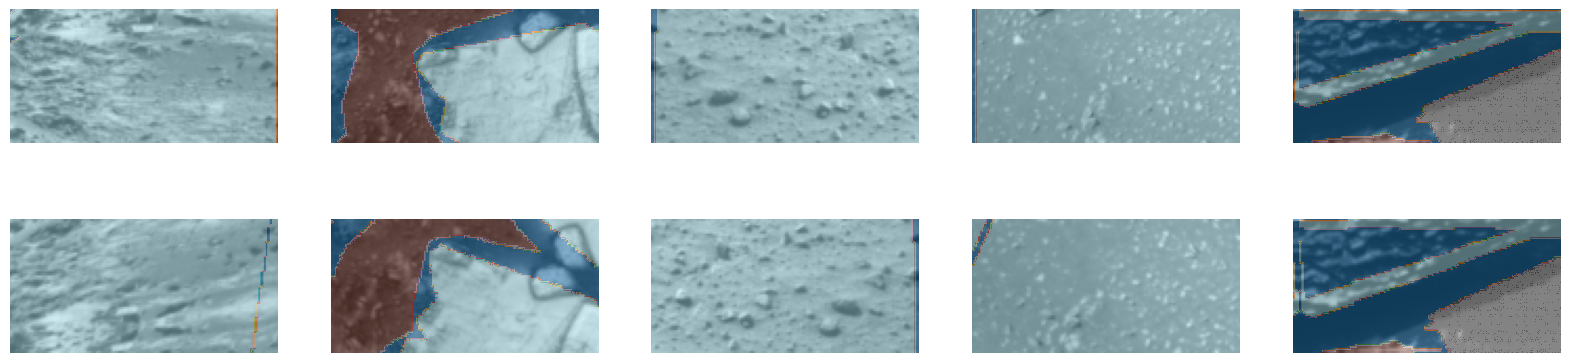

In [20]:
# show sizes before augmentation and after
print(X_train.shape, y_train.shape)
X_train_aug, y_train_aug, ind, trans = augment_data(X_train, y_train, total_augmentations=2000)

print(X_train_aug.shape, y_train_aug.shape)
# plot first 5 ind images (originals) and the augmented ones (first 5 after 2004 index)
# mask the images with the corresponding labels
print (trans[:5])
fig, ax = plt.subplots(2, 5, figsize=(20, 5))
for i in range(5):
    ax[0, i].imshow(X_train[ind[i], ..., 0], cmap='gray')
    ax[0, i].imshow(y_train[ind[i]], cmap='tab20', alpha=0.5)
    ax[0, i].axis('off')

    ax[1, i].imshow(X_train_aug[2004 + i, ..., 0], cmap='gray')
    ax[1, i].imshow(y_train_aug[2004 + i], cmap='tab20', alpha=0.5)
    ax[1, i].axis('off')

In [21]:
from tensorflow.keras.utils import Sequence

# Define the custom data generator for segmentation
class SegmentationDataGenerator(Sequence):
    def __init__(self, images, masks, batch_size, image_size, augmentations=None):
        self.images = images
        self.masks = masks
        self.batch_size = batch_size
        self.image_size = image_size
        self.augmentations = augmentations

    def __len__(self):
        return int(np.floor(len(self.images) / self.batch_size))

    def __getitem__(self, index):
        batch_images = self.images[index * self.batch_size: (index + 1) * self.batch_size]
        batch_masks = self.masks[index * self.batch_size: (index + 1) * self.batch_size]

        # plt.figure()
        # plt.title("batch 0 image ")
        # plt.imshow(batch_images[0]) #, cmap='gray')
        # plt.figure()
        # plt.imshow(colormap[batch_masks[0].astype(int)])
        
        # Apply augmentations if available
        
        augmented = self.__data_generation(batch_images, batch_masks)
        return augmented

    def __data_generation(self, batch_images, batch_masks):
        augmented_images = []
        augmented_masks = []
        
        for i in range(len(batch_images)):
            image = batch_images[i]
            mask = batch_masks[i]
            
            # Apply the augmentations
            if self.augmentations:
                augmented = self.augmentations(image=image, mask=mask)
                image = augmented['image']
                mask = augmented['mask']
                
            # Resize to target shape
            image = np.resize(image, self.image_size)
            mask = np.resize(mask, self.image_size)
            
            augmented_images.append(image)
            augmented_masks.append(mask)
        
        # plt.figure()
        # plt.title("augm image ")
        # plt.imshow(augmented_images[0]) #, cmap='gray')
        # plt.figure()

        augmented_masks = np.array(augmented_masks)
        # # Squeeze the single channel if present
        # first_mask = np.squeeze(augmented_masks[0]).astype(int)
        
        # # Ensure the values in the mask are within the valid range for the colormap
        # num_classes = colormap.shape[0]
        # first_mask = np.clip(first_mask, 0, num_classes - 1)
        
        # # Apply the colormap
        # colored_mask = colormap[first_mask]
        
        # # Plot the colored mask
        # plt.imshow(colored_mask)
        
        return np.array(augmented_images), augmented_masks

In [22]:
import albumentations as A

#Define augmentation pipeline using albumentations
augmentation_pipeline = A.Compose([
    A.HorizontalFlip(p=0.1),          # 50% chance to flip horizontally
    A.VerticalFlip(p=0.1),            # 50% chance to flip vertically
    A.RandomRotate90(p=0.1),          # 50% chance to rotate the image by 90 degrees
    A.RandomBrightnessContrast(p=0.1),# Randomly adjust brightness and contrast
    A.RandomScale(p=0.1),             # Random scaling of the image
    A.GaussianBlur(p=0.1),# Apply Gaussian blur with 20% chance
    A.GridDropout(ratio=0.2, unit_size_range=(10, 20), fill="random_uniform",  p=0.1),
    ],
    additional_targets={'mask': 'mask'}  # Tell albumentations this is a mask
)

# Create the data generator with augmentation
train_gen = SegmentationDataGenerator(
    images=X_train_aug, 
    masks= y_train_aug,
    batch_size=200, 
    image_size=X_train[0].shape,  # Specify the target image size
    augmentations=augmentation_pipeline
)

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/tmp/ipykernel_30/756227334.py:12: UserWarning: Argument 'fill' is not valid and will be ignored.
  A.GridDropout(ratio=0.2, unit_size_range=(10, 20), fill="random_uniform",  p=0.1),


## 🛠️ Model

In [25]:
def unet(input_shape, num_classes=5):
    inputs = layers.Input(shape=input_shape)

    # Contracting path (Encoder)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.BatchNormalization()(c1)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = layers.BatchNormalization()(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.BatchNormalization()(c2)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = layers.BatchNormalization()(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.BatchNormalization()(c3)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    c3 = layers.BatchNormalization()(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.BatchNormalization()(c4)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    c4 = layers.BatchNormalization()(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.BatchNormalization()(c5)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    c5 = layers.BatchNormalization()(c5)
    p5 = layers.MaxPooling2D((2, 2))(c5)  # New pooling layer

    # Additional encoder block
    c6 = layers.Conv2D(2048, (3, 3), activation='relu', padding='same')(p5)
    c6 = layers.BatchNormalization()(c6)
    c6 = layers.Conv2D(2048, (3, 3), activation='relu', padding='same')(c6)
    c6 = layers.BatchNormalization()(c6)

    # Expanding path (Decoder)
    u7 = layers.Conv2DTranspose(1024, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c5])
    c7 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.BatchNormalization()(c7)
    c7 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c7)
    c7 = layers.BatchNormalization()(c7)

    u8 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c4])
    c8 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.BatchNormalization()(c8)
    c8 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c8)
    c8 = layers.BatchNormalization()(c8)

    u9 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c3])
    c9 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.BatchNormalization()(c9)
    c9 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c9)
    c9 = layers.BatchNormalization()(c9)

    u10 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c9)
    u10 = layers.concatenate([u10, c2])
    c10 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u10)
    c10 = layers.BatchNormalization()(c10)
    c10 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c10)
    c10 = layers.BatchNormalization()(c10)

    u11 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c10)
    u11 = layers.concatenate([u11, c1])
    c11 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u11)
    c11 = layers.BatchNormalization()(c11)
    c11 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c11)
    c11 = layers.BatchNormalization()(c11)

    # Output layer
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(c11)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

## Metric and Loss

In [26]:
@register_keras_serializable()
class MeanIntersectionOverUnion(tf.keras.metrics.MeanIoU):
    def __init__(self, num_classes, labels_to_exclude=None, name="mean_iou", dtype=None, **kwargs):
        super(MeanIntersectionOverUnion, self).__init__(num_classes=num_classes, name=name, dtype=dtype, **kwargs)
        if labels_to_exclude is None:
            labels_to_exclude = [0]  # Default to excluding label 0
        self.labels_to_exclude = labels_to_exclude

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert predictions to class labels
        y_pred = tf.math.argmax(y_pred, axis=-1)

        # Flatten the tensors
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])

        # Apply mask to exclude specified labels
        for label in self.labels_to_exclude:
            mask = tf.not_equal(y_true, label)
            y_true = tf.boolean_mask(y_true, mask)
            y_pred = tf.boolean_mask(y_pred, mask)

        # Update the state
        return super().update_state(y_true, y_pred, sample_weight)
        
    def get_config(self):
        config = super(MeanIntersectionOverUnion, self).get_config()
        config.update({"labels_to_exclude": self.labels_to_exclude})
        return config
    
    @classmethod
    def from_config(cls, config):
        labels_to_exclude = config.pop("labels_to_exclude", None)
        return cls(labels_to_exclude=labels_to_exclude, **config)

In [27]:
def compute_class_weights(y_true):
    """
    Compute class weights based on the frequency of each class in the dataset.
    Args:
        y_true (numpy array): Ground truth mask (integer-encoded).
    Returns:
        dict: Class weights where the key is the class ID, and the value is the weight.
    """
    # Flatten the mask to count pixels for each class
    y_true_flat = y_true.flatten()

    # Count the number of pixels in each class
    y_true_flat = y_true_flat.astype(np.int32)    
    class_counts = np.bincount(y_true_flat)

    # Compute total number of pixels
    total_pixels = np.sum(class_counts)

    # Compute weights inversely proportional to frequency
    class_weights = {i: total_pixels / count for i, count in enumerate(class_counts) if count > 0}

    # Normalize weights to ensure stability
    max_weight = max(class_weights.values())
    class_weights = {k: v / max_weight for k, v in class_weights.items()}

    return class_weights


class_weights = compute_class_weights(y)
print("Class Weights:", class_weights)  # Class Weights: {0: 0.00540467837523297, 1: 0.003875365107599844, 2: 0.005644561956619586, 3: 0.0071504284343232236, 4: 1.0}

scaling_factor = 80  # Adjust this factor as needed

# Scale the weights for classes 0, 1, 2, 3 and leave class 4 at 1
class_weights = {k: (v * scaling_factor if k != 4 else 1) for k, v in class_weights.items()}
print("New class weights ",class_weights)

#convert in an array dividing each class for the minimum value and assign 1 to background
weights_list = list(class_weights.values())
min_weight = tf.reduce_min(weights_list[1:])
normalized_weights = [1.0] + [float(weight) / float(min_weight) for weight in weights_list[1:]]

weights = np.array(normalized_weights, dtype=np.float32)
print("Normalized class weights (array):", weights)

Class Weights: {0: 0.00540467837523297, 1: 0.003875365107599844, 2: 0.005644561956619586, 3: 0.0071504284343232236, 4: 1.0}
New class weights  {0: 0.4323742700186376, 1: 0.3100292086079875, 2: 0.45156495652956685, 3: 0.5720342747458579, 4: 1}


In [28]:
pip install focal-loss

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [29]:
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.utils import register_keras_serializable
from focal_loss import SparseCategoricalFocalLoss

In [30]:
# Define input shape and number of classes (ignoring background)
num_classes = 5  # 5 classes including background, but we'll ignore class 0 in metrics

# Instantiate the U-Net model
model = unet(input_shape, num_classes)

model.compile(optimizer="adam", loss=SparseCategoricalFocalLoss(gamma = 2,class_weight = weights), metrics=[MeanIntersectionOverUnion(num_classes=num_classes, labels_to_exclude=[0])])

#summary 
model.summary()

# Generate and display a graphical representation of the model architecture.
tf.keras.utils.plot_model(model, show_trainable=True, expand_nested=True, dpi=70)

## 🛠️ Train and Save the Model
Definition of the callbacks

In [31]:
reduce_lr = tfk.callbacks.ReduceLROnPlateau(
    monitor='val_loss',             # Monitor validation loss
    factor=0.2,                     # Reduce the learning rate by a factor of 0.2
    patience=10,       # Wait for patience epochs before reducing the learning rate
    min_lr=1e-8,                    # Minimum learning rate 
    verbose=1
)

early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min', 
    patience=30,
    restore_best_weights=True
)

# Visualization callback
NUM_CLASSES = 5
class VizCallback(tf.keras.callbacks.Callback):
    def __init__(self, image_path, label_path, frequency=5):
        super().__init__()
        self.image_path = image_path
        self.label_path = label_path
        self.frequency = frequency

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.frequency == 0:  # Visualize only every "frequency" epochs
            image, label = self.image_path, self.label_path
            #label = apply_category_mapping(label)
            image = tf.expand_dims(image, 0)
            pred = self.model.predict(image, verbose=0)
            y_pred = tf.math.argmax(pred, axis=-1)
            y_pred = y_pred.numpy()

            # Create colormap
            num_classes = NUM_CLASSES
            colormap = create_segmentation_colormap(num_classes)

            plt.figure(figsize=(16, 4))

            # Input image
            plt.subplot(1, 3, 1)
            plt.imshow(image[0])
            plt.title("Input Image")
            plt.axis('off')

            # Ground truth
            plt.subplot(1, 3, 2)
            #colored_label = apply_colormap(label, colormap)
            plt.imshow(colormap[label.astype(int)])
            plt.title("Ground Truth Mask")
            plt.axis('off')

            # Prediction
            plt.subplot(1, 3, 3)
            #colored_pred = apply_colormap(y_pred[0], colormap)
            plt.imshow(colormap[y_pred[0].astype(int)])
            plt.title("Predicted Mask")
            plt.axis('off')

            plt.tight_layout()
            plt.show()
            plt.close()

In [32]:
viz_callback = VizCallback(X_valid[0], y_valid[0])
print(y_train[0][20, 30])

callbacks = [reduce_lr, early_stopping, viz_callback]

1.0


Epoch 1/500


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734040034.827558     101 service.cc:145] XLA service 0x7a5c80002840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734040034.827637     101 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1734040117.037489     101 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_46', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_45', 4 bytes spill stores, 12 bytes spil

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step - loss: 1.1936 - mean_iou: 0.1484

W0000 00:00:1734040134.680008      99 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_focal_loss/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
W0000 00:00:1734040144.257677      99 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_focal_loss/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


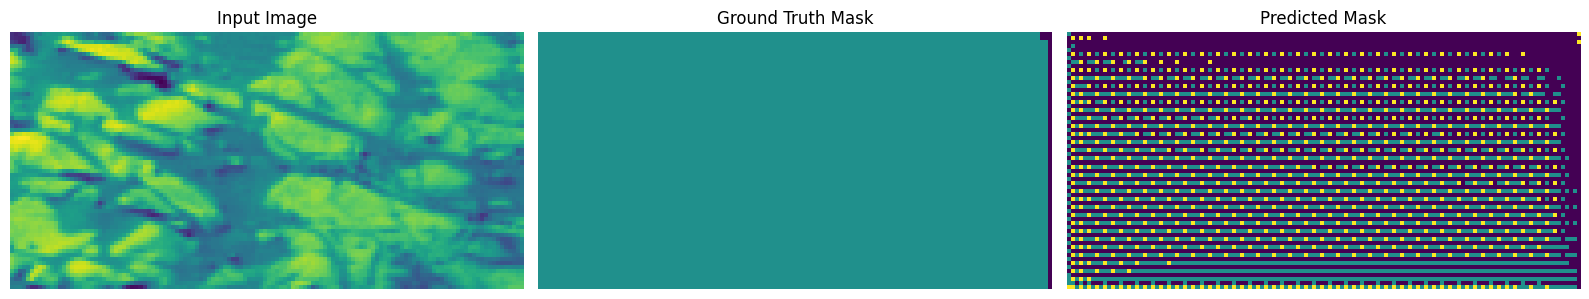

20/20 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - loss: 1.1813 - mean_iou: 0.1497 - val_loss: 14.9696 - val_mean_iou: 0.0326 - learning_rate: 0.0010
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 739ms/step - loss: 0.6071 - mean_iou: 0.2373 - val_loss: 16.2069 - val_mean_iou: 0.0021 - learning_rate: 0.0010
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 740ms/step - loss: 0.4958 - mean_iou: 0.2625 - val_loss: 15.3888 - val_mean_iou: 0.0275 - learning_rate: 0.0010
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 741ms/step - loss: 0.4448 - mean_iou: 0.2799 - val_loss: 16.3205 - val_mean_iou: 8.9996e-04 - learning_rate: 0.0010
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 774ms/step - loss: 0.4124 - mean_iou: 0.2889 - val_loss: 14.5967 - val_mean_iou: 0.0058 - learning_rate: 0.0010
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - loss: 0.3582 - mean_iou: 0.3146

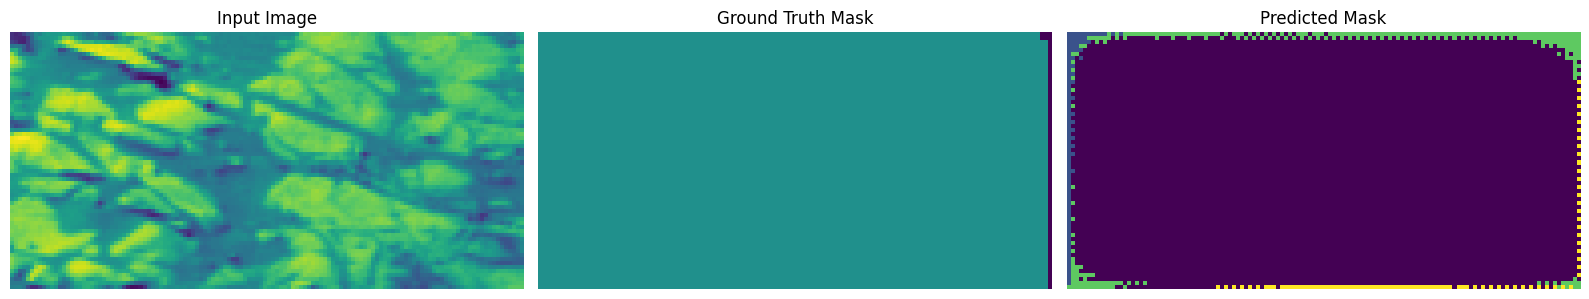

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 793ms/step - loss: 0.3578 - mean_iou: 0.3149 - val_loss: 12.7223 - val_mean_iou: 0.0137 - learning_rate: 0.0010
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 775ms/step - loss: 0.3330 - mean_iou: 0.3376 - val_loss: 7.2139 - val_mean_iou: 0.0622 - learning_rate: 0.0010
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 743ms/step - loss: 0.3213 - mean_iou: 0.3441 - val_loss: 14.1812 - val_mean_iou: 0.0118 - learning_rate: 0.0010
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 744ms/step - loss: 0.3034 - mean_iou: 0.3394 - val_loss: 12.7988 - val_mean_iou: 0.0171 - learning_rate: 0.0010
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - loss: 0.2865 - mean_iou: 0.3335 - val_loss: 5.6982 - val_mean_iou: 0.0959 - learning_rate: 0.0010
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - loss: 0.2924 - mean_iou: 0.3483

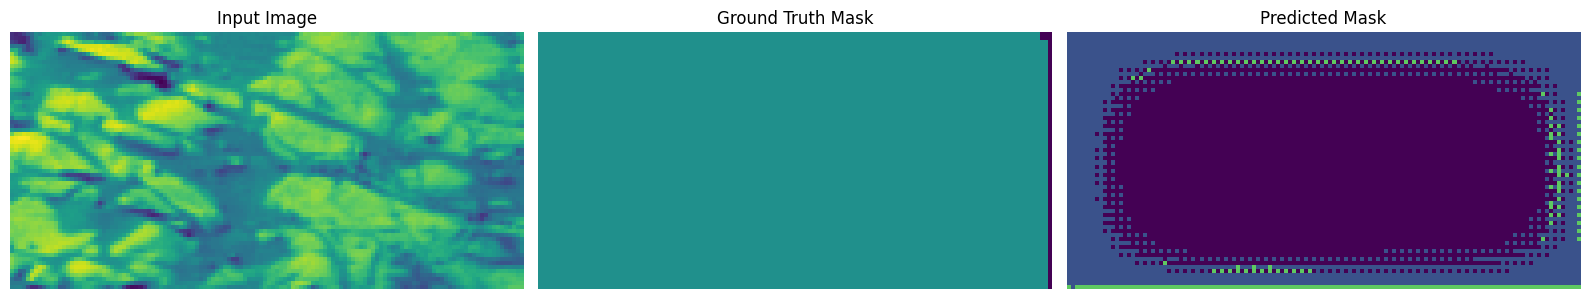

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 765ms/step - loss: 0.2926 - mean_iou: 0.3481 - val_loss: 6.8273 - val_mean_iou: 0.0540 - learning_rate: 0.0010
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 744ms/step - loss: 0.2835 - mean_iou: 0.3480 - val_loss: 7.1246 - val_mean_iou: 0.0560 - learning_rate: 0.0010
Epoch 13/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.2607 - mean_iou: 0.3728 - val_loss: 8.8729 - val_mean_iou: 0.0319 - learning_rate: 0.0010
Epoch 14/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 773ms/step - loss: 0.2631 - mean_iou: 0.3679 - val_loss: 5.3054 - val_mean_iou: 0.0525 - learning_rate: 0.0010
Epoch 15/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 778ms/step - loss: 0.2435 - mean_iou: 0.3922 - val_loss: 4.7307 - val_mean_iou: 0.1754 - learning_rate: 0.0010
Epoch 16/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - loss: 0.2295 - mean_iou: 0.3872

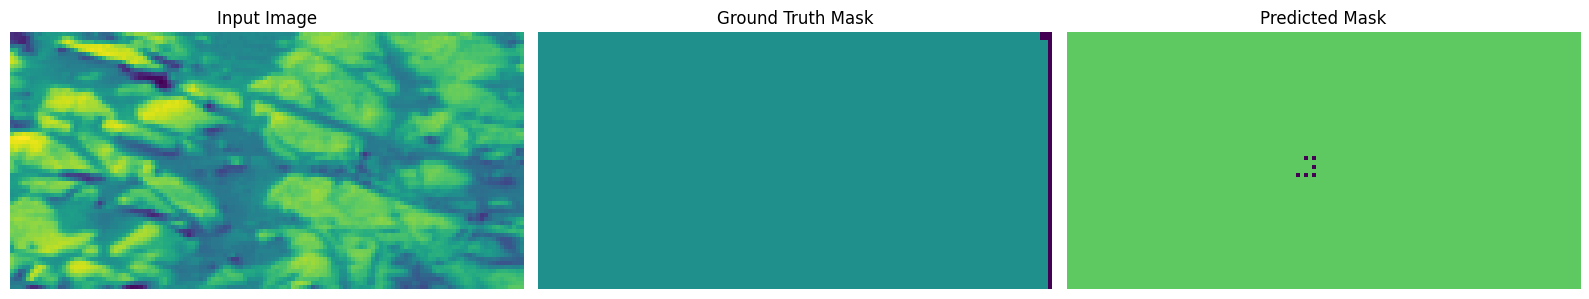

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 760ms/step - loss: 0.2295 - mean_iou: 0.3872 - val_loss: 5.0107 - val_mean_iou: 0.0548 - learning_rate: 0.0010
Epoch 17/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.2306 - mean_iou: 0.3952 - val_loss: 5.2204 - val_mean_iou: 0.0656 - learning_rate: 0.0010
Epoch 18/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 773ms/step - loss: 0.2044 - mean_iou: 0.4372 - val_loss: 4.6040 - val_mean_iou: 0.0656 - learning_rate: 0.0010
Epoch 19/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 778ms/step - loss: 0.2045 - mean_iou: 0.4437 - val_loss: 4.2796 - val_mean_iou: 0.0876 - learning_rate: 0.0010
Epoch 20/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 778ms/step - loss: 0.2070 - mean_iou: 0.4393 - val_loss: 3.4958 - val_mean_iou: 0.1326 - learning_rate: 0.0010
Epoch 21/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - loss: 0.2054 - mean_iou: 0.4222

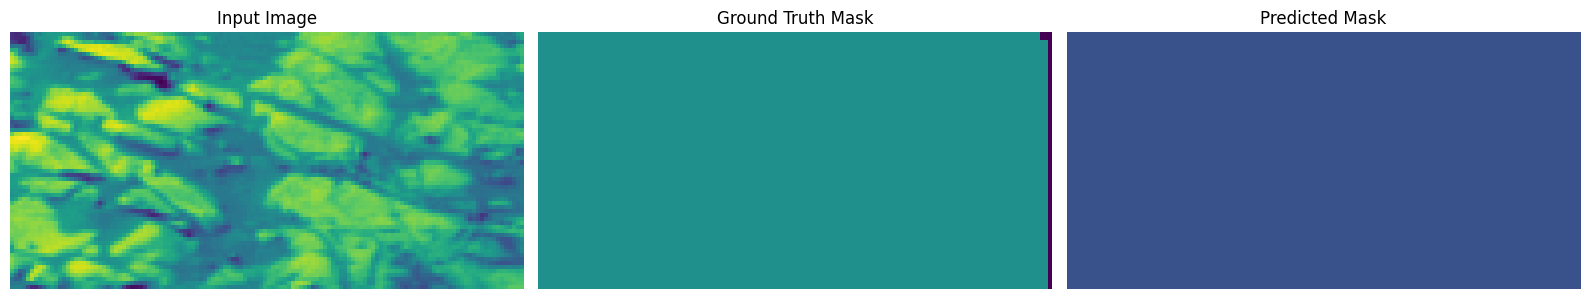

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 759ms/step - loss: 0.2053 - mean_iou: 0.4211 - val_loss: 3.6656 - val_mean_iou: 0.1872 - learning_rate: 0.0010
Epoch 22/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 775ms/step - loss: 0.2246 - mean_iou: 0.4076 - val_loss: 1.0063 - val_mean_iou: 0.0823 - learning_rate: 0.0010
Epoch 23/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.2101 - mean_iou: 0.4182 - val_loss: 1.4012 - val_mean_iou: 0.0869 - learning_rate: 0.0010
Epoch 24/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.2003 - mean_iou: 0.4151 - val_loss: 1.5001 - val_mean_iou: 0.2637 - learning_rate: 0.0010
Epoch 25/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.2087 - mean_iou: 0.4773 - val_loss: 1.6508 - val_mean_iou: 0.1507 - learning_rate: 0.0010
Epoch 26/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - loss: 0.1916 - mean_iou: 0.5193

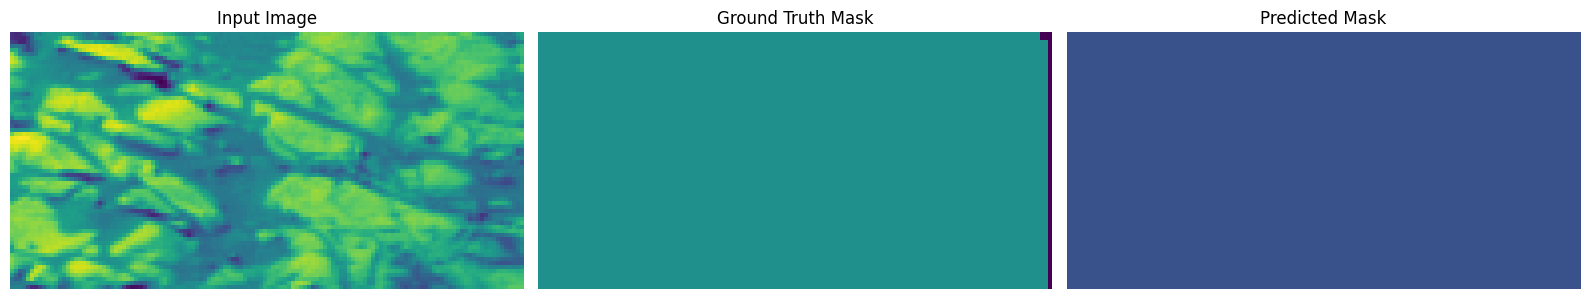

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 765ms/step - loss: 0.1913 - mean_iou: 0.5146 - val_loss: 2.5029 - val_mean_iou: 0.1556 - learning_rate: 0.0010
Epoch 27/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.1952 - mean_iou: 0.5074 - val_loss: 2.0747 - val_mean_iou: 0.0834 - learning_rate: 0.0010
Epoch 28/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.1660 - mean_iou: 0.5515 - val_loss: 2.7091 - val_mean_iou: 0.0674 - learning_rate: 0.0010
Epoch 29/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.1620 - mean_iou: 0.4554 - val_loss: 1.7615 - val_mean_iou: 0.1605 - learning_rate: 0.0010
Epoch 30/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 771ms/step - loss: 0.1629 - mean_iou: 0.4482 - val_loss: 0.7133 - val_mean_iou: 0.3327 - learning_rate: 0.0010
Epoch 31/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 0.1797 - mean_iou: 0.4350

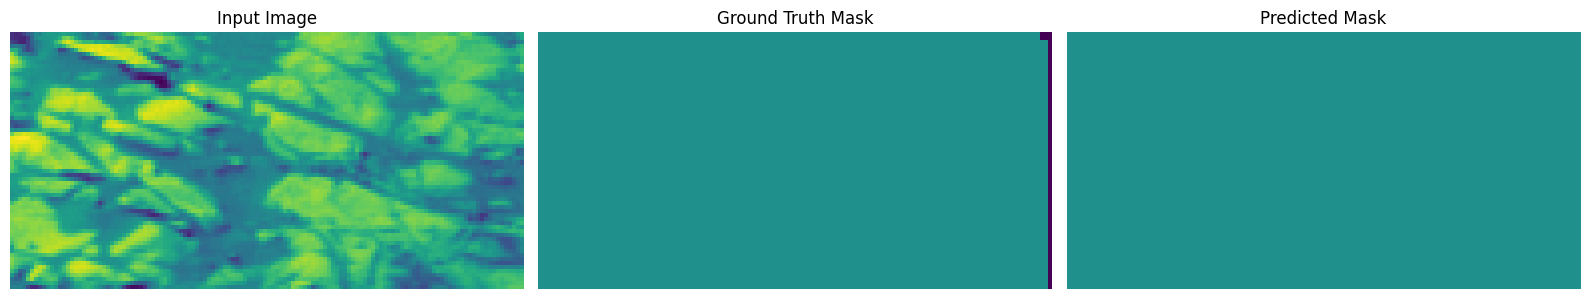

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 788ms/step - loss: 0.1793 - mean_iou: 0.4349 - val_loss: 0.4464 - val_mean_iou: 0.4131 - learning_rate: 0.0010
Epoch 32/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 772ms/step - loss: 0.1777 - mean_iou: 0.4356 - val_loss: 0.2959 - val_mean_iou: 0.3520 - learning_rate: 0.0010
Epoch 33/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.1561 - mean_iou: 0.5592 - val_loss: 0.4017 - val_mean_iou: 0.3838 - learning_rate: 0.0010
Epoch 34/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.1593 - mean_iou: 0.5060 - val_loss: 0.8731 - val_mean_iou: 0.3461 - learning_rate: 0.0010
Epoch 35/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.1669 - mean_iou: 0.5075 - val_loss: 0.5921 - val_mean_iou: 0.3752 - learning_rate: 0.0010
Epoch 36/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 0.1483 - mean_iou: 0.5744

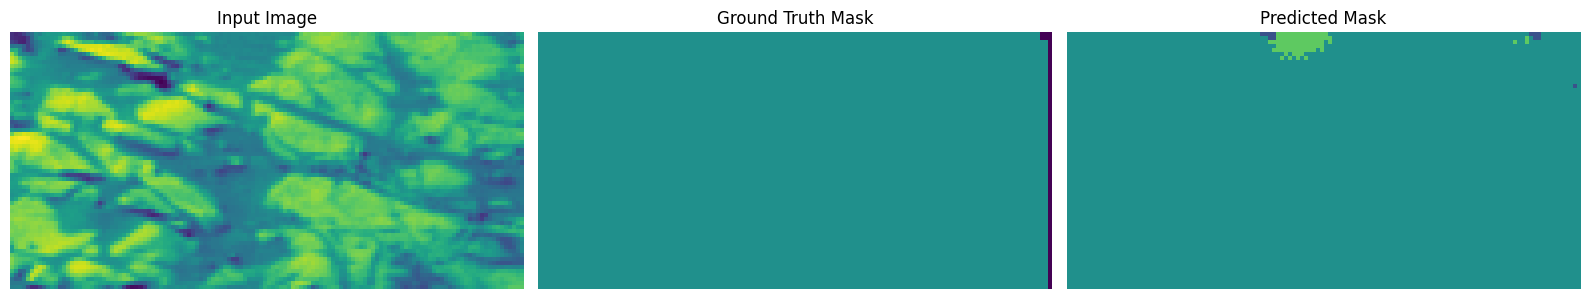

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 766ms/step - loss: 0.1484 - mean_iou: 0.5741 - val_loss: 0.3658 - val_mean_iou: 0.4085 - learning_rate: 0.0010
Epoch 37/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.1591 - mean_iou: 0.4663 - val_loss: 1.2204 - val_mean_iou: 0.2173 - learning_rate: 0.0010
Epoch 38/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.1633 - mean_iou: 0.5540 - val_loss: 0.3119 - val_mean_iou: 0.4283 - learning_rate: 0.0010
Epoch 39/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 772ms/step - loss: 0.1496 - mean_iou: 0.5587 - val_loss: 0.2697 - val_mean_iou: 0.5280 - learning_rate: 0.0010
Epoch 40/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.1396 - mean_iou: 0.5686 - val_loss: 0.3016 - val_mean_iou: 0.4620 - learning_rate: 0.0010
Epoch 41/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 0.1475 - mean_iou: 0.5649

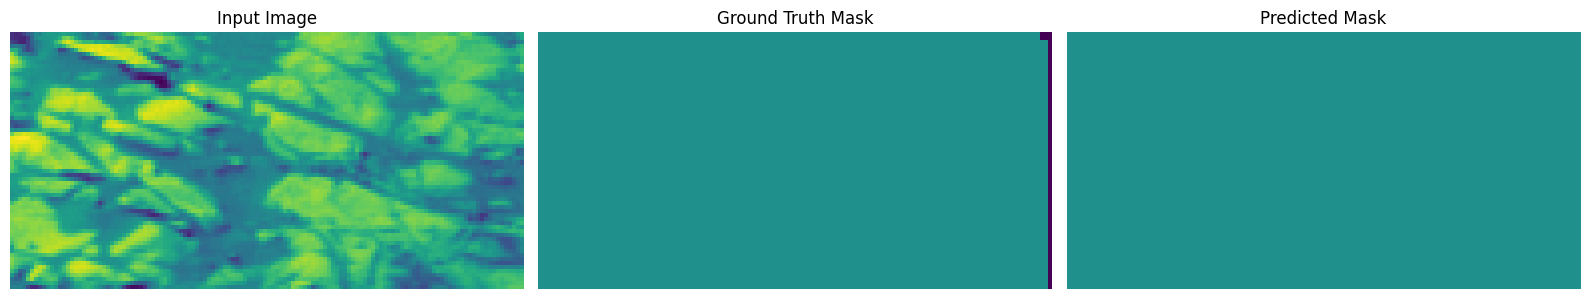

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 760ms/step - loss: 0.1472 - mean_iou: 0.5652 - val_loss: 0.7958 - val_mean_iou: 0.2380 - learning_rate: 0.0010
Epoch 42/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 744ms/step - loss: 0.1320 - mean_iou: 0.5732 - val_loss: 0.3218 - val_mean_iou: 0.4960 - learning_rate: 0.0010
Epoch 43/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 773ms/step - loss: 0.1485 - mean_iou: 0.5607 - val_loss: 0.2433 - val_mean_iou: 0.5176 - learning_rate: 0.0010
Epoch 44/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.1443 - mean_iou: 0.5728 - val_loss: 0.2740 - val_mean_iou: 0.3801 - learning_rate: 0.0010
Epoch 45/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.1347 - mean_iou: 0.5835 - val_loss: 0.3046 - val_mean_iou: 0.4911 - learning_rate: 0.0010
Epoch 46/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - loss: 0.1406 - mean_iou: 0.5285

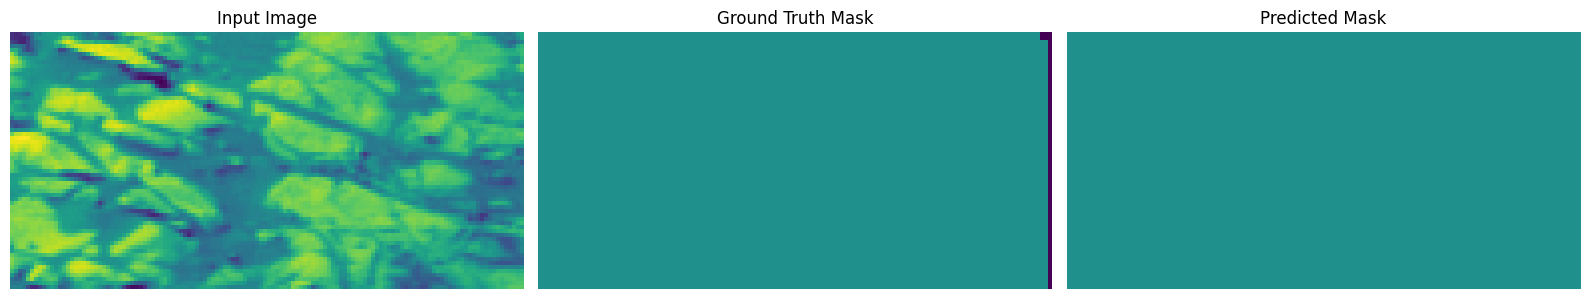

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 760ms/step - loss: 0.1406 - mean_iou: 0.5253 - val_loss: 0.3343 - val_mean_iou: 0.3722 - learning_rate: 0.0010
Epoch 47/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.1374 - mean_iou: 0.5395 - val_loss: 0.4682 - val_mean_iou: 0.4238 - learning_rate: 0.0010
Epoch 48/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 775ms/step - loss: 0.1264 - mean_iou: 0.6053 - val_loss: 0.2355 - val_mean_iou: 0.5170 - learning_rate: 0.0010
Epoch 49/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 744ms/step - loss: 0.1323 - mean_iou: 0.5982 - val_loss: 0.2642 - val_mean_iou: 0.5209 - learning_rate: 0.0010
Epoch 50/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.1232 - mean_iou: 0.6057 - val_loss: 0.2728 - val_mean_iou: 0.4842 - learning_rate: 0.0010
Epoch 51/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 0.1309 - mean_iou: 0.5908

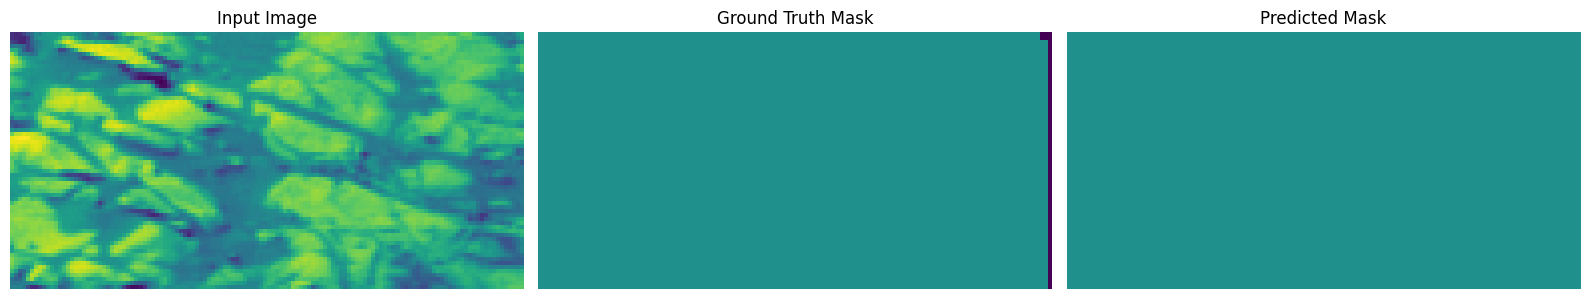

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 761ms/step - loss: 0.1306 - mean_iou: 0.5911 - val_loss: 0.3106 - val_mean_iou: 0.5178 - learning_rate: 0.0010
Epoch 52/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 775ms/step - loss: 0.1225 - mean_iou: 0.6065 - val_loss: 0.1948 - val_mean_iou: 0.4302 - learning_rate: 0.0010
Epoch 53/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 772ms/step - loss: 0.1218 - mean_iou: 0.5249 - val_loss: 0.1817 - val_mean_iou: 0.5531 - learning_rate: 0.0010
Epoch 54/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.1202 - mean_iou: 0.6059 - val_loss: 0.6325 - val_mean_iou: 0.2546 - learning_rate: 0.0010
Epoch 55/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 744ms/step - loss: 0.1248 - mean_iou: 0.6018 - val_loss: 0.4784 - val_mean_iou: 0.3959 - learning_rate: 0.0010
Epoch 56/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 0.1191 - mean_iou: 0.6284

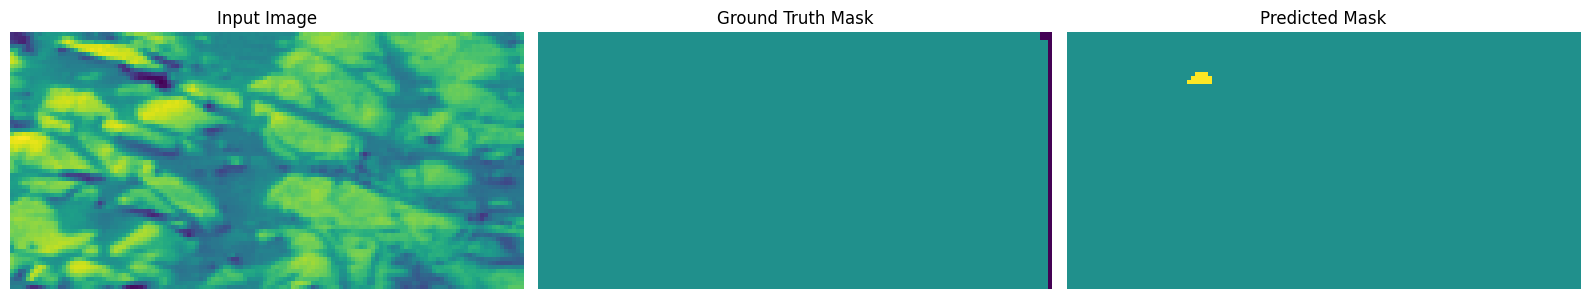

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 764ms/step - loss: 0.1191 - mean_iou: 0.6281 - val_loss: 0.5437 - val_mean_iou: 0.3525 - learning_rate: 0.0010
Epoch 57/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.1431 - mean_iou: 0.5916 - val_loss: 0.5048 - val_mean_iou: 0.3312 - learning_rate: 0.0010
Epoch 58/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.1212 - mean_iou: 0.5920 - val_loss: 0.2294 - val_mean_iou: 0.5473 - learning_rate: 0.0010
Epoch 59/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.1116 - mean_iou: 0.6421 - val_loss: 0.2190 - val_mean_iou: 0.5008 - learning_rate: 0.0010
Epoch 60/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.1187 - mean_iou: 0.6161 - val_loss: 0.2744 - val_mean_iou: 0.5381 - learning_rate: 0.0010
Epoch 61/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - loss: 0.1040 - mean_iou: 0.6357

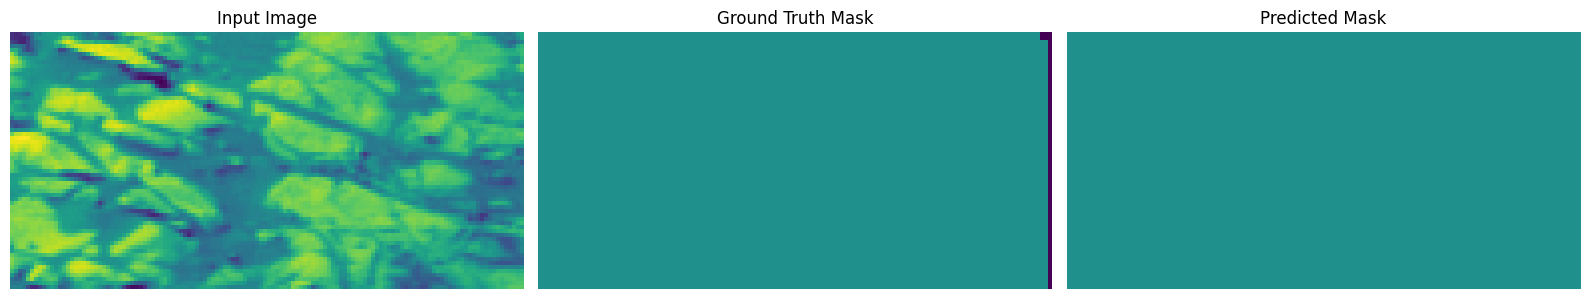

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 766ms/step - loss: 0.1041 - mean_iou: 0.6357 - val_loss: 0.2297 - val_mean_iou: 0.5193 - learning_rate: 0.0010
Epoch 62/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.1069 - mean_iou: 0.6465 - val_loss: 0.2329 - val_mean_iou: 0.5398 - learning_rate: 0.0010
Epoch 63/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - loss: 0.1207 - mean_iou: 0.6168
Epoch 63: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - loss: 0.1206 - mean_iou: 0.6170 - val_loss: 0.2192 - val_mean_iou: 0.4575 - learning_rate: 0.0010
Epoch 64/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 772ms/step - loss: 0.0997 - mean_iou: 0.5375 - val_loss: 0.1561 - val_mean_iou: 0.6093 - learning_rate: 2.0000e-04
Epoch 65/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 775ms/step - loss: 0.1027 - mean_iou: 0.6610 - val_loss: 0.1396 - val_mean_iou: 0.6144 - learning_rate: 2.0000e-04
Epoch 66/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 0.0881 - mean_i

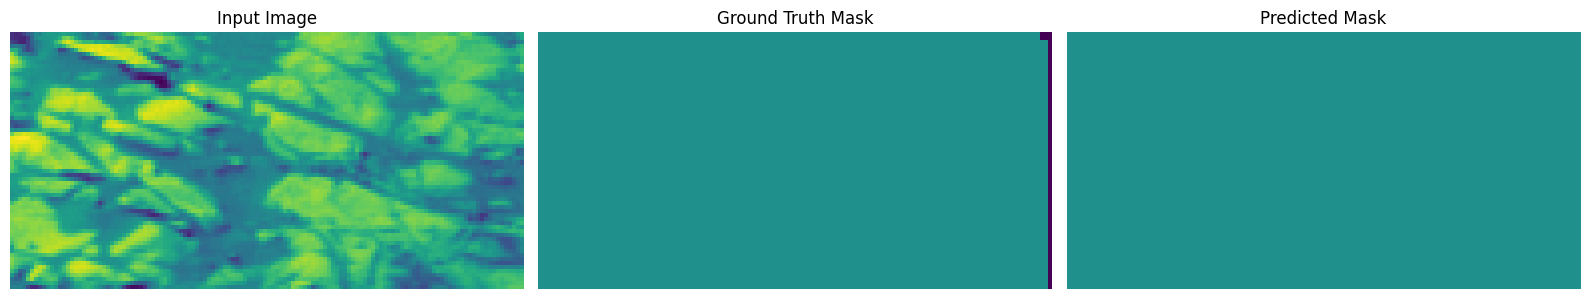

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 794ms/step - loss: 0.0881 - mean_iou: 0.6677 - val_loss: 0.1317 - val_mean_iou: 0.6298 - learning_rate: 2.0000e-04
Epoch 67/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 775ms/step - loss: 0.0842 - mean_iou: 0.6596 - val_loss: 0.1203 - val_mean_iou: 0.6628 - learning_rate: 2.0000e-04
Epoch 68/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 775ms/step - loss: 0.0934 - mean_iou: 0.6645 - val_loss: 0.1190 - val_mean_iou: 0.6599 - learning_rate: 2.0000e-04
Epoch 69/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0897 - mean_iou: 0.6680 - val_loss: 0.1254 - val_mean_iou: 0.6538 - learning_rate: 2.0000e-04
Epoch 70/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 774ms/step - loss: 0.0851 - mean_iou: 0.6947 - val_loss: 0.1134 - val_mean_iou: 0.6699 - learning_rate: 2.0000e-04
Epoch 71/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 0.0809 - mean_iou: 0.5371

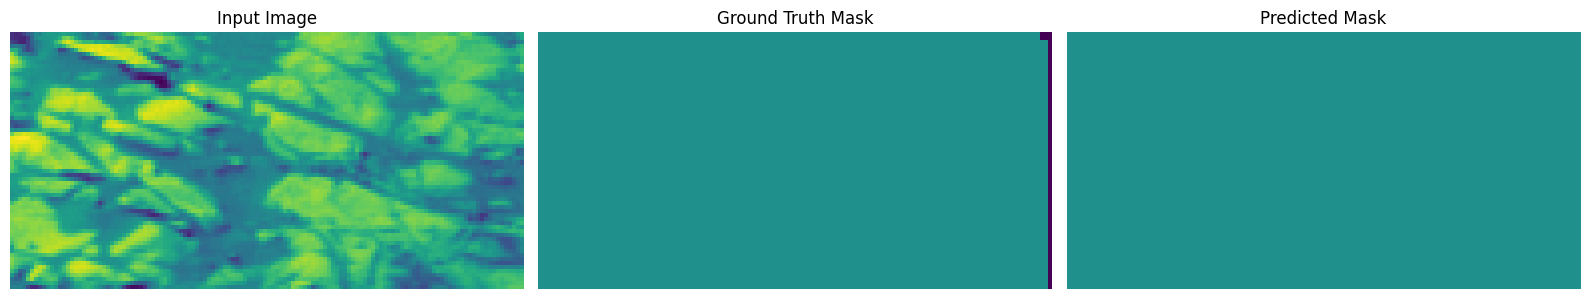

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 762ms/step - loss: 0.0810 - mean_iou: 0.5377 - val_loss: 0.1583 - val_mean_iou: 0.6541 - learning_rate: 2.0000e-04
Epoch 72/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0839 - mean_iou: 0.5772 - val_loss: 0.1323 - val_mean_iou: 0.6677 - learning_rate: 2.0000e-04
Epoch 73/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 779ms/step - loss: 0.0771 - mean_iou: 0.6895 - val_loss: 0.1108 - val_mean_iou: 0.6748 - learning_rate: 2.0000e-04
Epoch 74/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0815 - mean_iou: 0.6274 - val_loss: 0.1232 - val_mean_iou: 0.6507 - learning_rate: 2.0000e-04
Epoch 75/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0759 - mean_iou: 0.7188 - val_loss: 0.1229 - val_mean_iou: 0.6702 - learning_rate: 2.0000e-04
Epoch 76/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - loss: 0.0771 - mean_iou: 0.7125

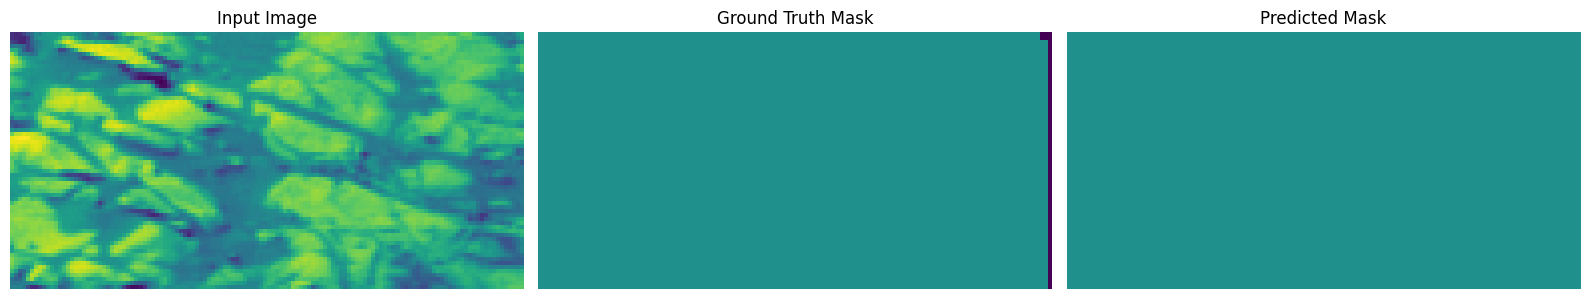

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 761ms/step - loss: 0.0773 - mean_iou: 0.7117 - val_loss: 0.1119 - val_mean_iou: 0.6709 - learning_rate: 2.0000e-04
Epoch 77/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0804 - mean_iou: 0.6373 - val_loss: 0.1128 - val_mean_iou: 0.6672 - learning_rate: 2.0000e-04
Epoch 78/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - loss: 0.0808 - mean_iou: 0.6985 - val_loss: 0.1314 - val_mean_iou: 0.6598 - learning_rate: 2.0000e-04
Epoch 79/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0796 - mean_iou: 0.6430 - val_loss: 0.1210 - val_mean_iou: 0.6359 - learning_rate: 2.0000e-04
Epoch 80/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0761 - mean_iou: 0.6797 - val_loss: 0.1206 - val_mean_iou: 0.6619 - learning_rate: 2.0000e-04
Epoch 81/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - loss: 0.0677 - mean_iou: 0.7184

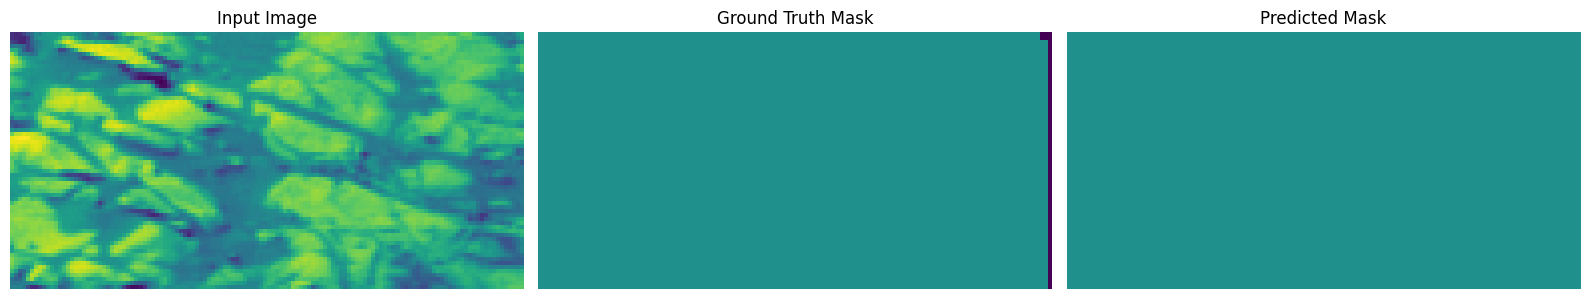

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 767ms/step - loss: 0.0679 - mean_iou: 0.7183 - val_loss: 0.1112 - val_mean_iou: 0.6744 - learning_rate: 2.0000e-04
Epoch 82/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0781 - mean_iou: 0.6588 - val_loss: 0.1184 - val_mean_iou: 0.6385 - learning_rate: 2.0000e-04
Epoch 83/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 0.0721 - mean_iou: 0.7163
Epoch 83: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0724 - mean_iou: 0.7155 - val_loss: 0.1143 - val_mean_iou: 0.6478 - learning_rate: 2.0000e-04
Epoch 84/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 744ms/step - loss: 0.0775 - mean_iou: 0.6697 - val_loss: 0.1177 - val_mean_iou: 0.6572 - learning_rate: 4.0000e-05
Epoch 85/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0681 - mean_iou: 0.6246 - val_loss: 0.1159 - val_mean_iou: 0.6710 - learning_rate: 4.0000e-05
Epoch 86/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 0.0

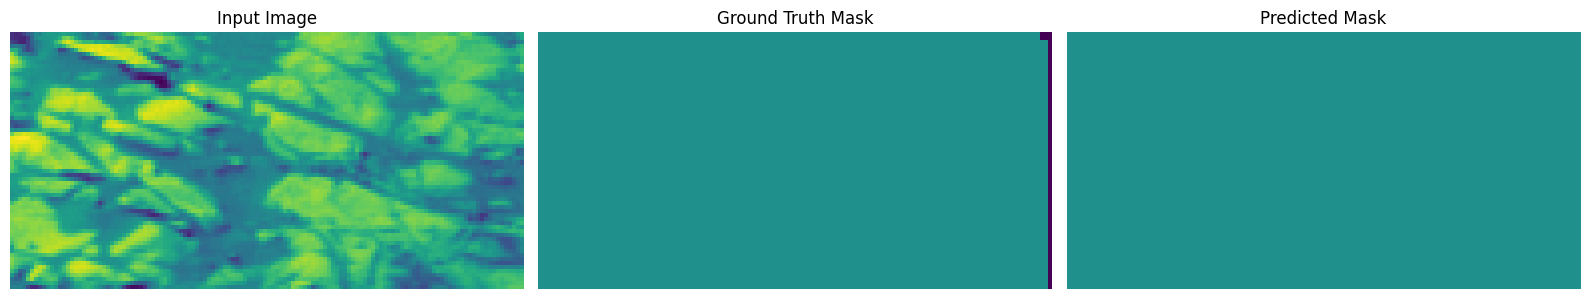

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 764ms/step - loss: 0.0620 - mean_iou: 0.7342 - val_loss: 0.1177 - val_mean_iou: 0.6719 - learning_rate: 4.0000e-05
Epoch 87/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0727 - mean_iou: 0.7112 - val_loss: 0.1223 - val_mean_iou: 0.6655 - learning_rate: 4.0000e-05
Epoch 88/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0697 - mean_iou: 0.7045 - val_loss: 0.1180 - val_mean_iou: 0.6723 - learning_rate: 4.0000e-05
Epoch 89/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0679 - mean_iou: 0.6295 - val_loss: 0.1137 - val_mean_iou: 0.6779 - learning_rate: 4.0000e-05
Epoch 90/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0646 - mean_iou: 0.6139 - val_loss: 0.1125 - val_mean_iou: 0.6764 - learning_rate: 4.0000e-05
Epoch 91/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - loss: 0.0679 - mean_iou: 0.7107

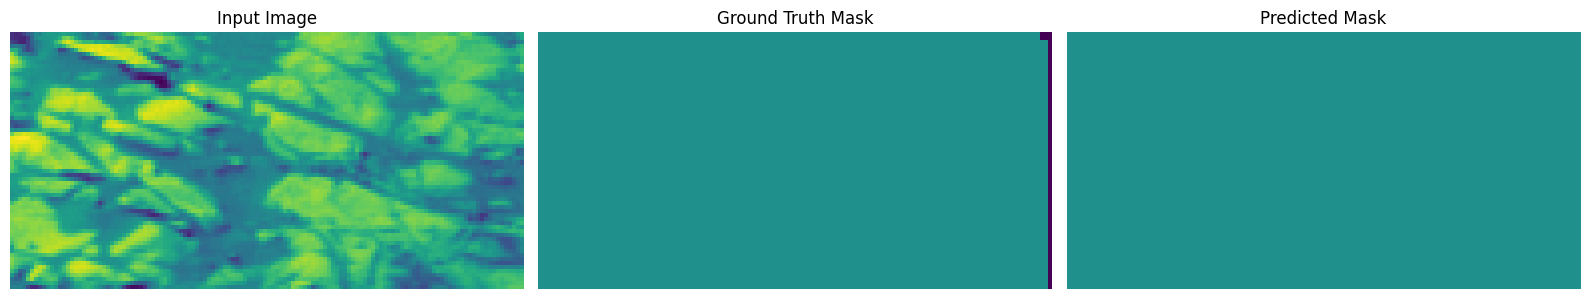

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 764ms/step - loss: 0.0677 - mean_iou: 0.7117 - val_loss: 0.1160 - val_mean_iou: 0.6724 - learning_rate: 4.0000e-05
Epoch 92/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 775ms/step - loss: 0.0702 - mean_iou: 0.7098 - val_loss: 0.1103 - val_mean_iou: 0.6803 - learning_rate: 4.0000e-05
Epoch 93/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 744ms/step - loss: 0.0695 - mean_iou: 0.7056 - val_loss: 0.1115 - val_mean_iou: 0.6752 - learning_rate: 4.0000e-05
Epoch 94/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0703 - mean_iou: 0.7115 - val_loss: 0.1113 - val_mean_iou: 0.6837 - learning_rate: 4.0000e-05
Epoch 95/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 774ms/step - loss: 0.0711 - mean_iou: 0.6759 - val_loss: 0.1085 - val_mean_iou: 0.6884 - learning_rate: 4.0000e-05
Epoch 96/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - loss: 0.0695 - mean_iou: 0.7482

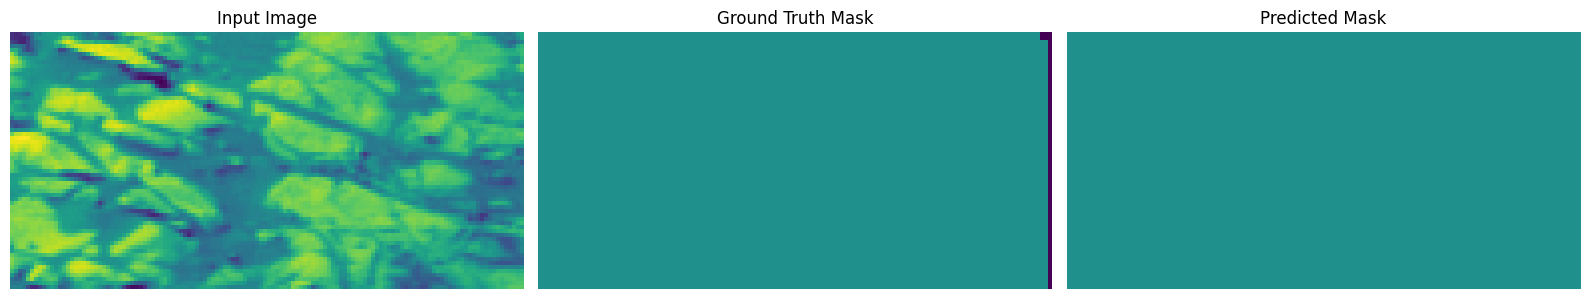

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 764ms/step - loss: 0.0694 - mean_iou: 0.7473 - val_loss: 0.1126 - val_mean_iou: 0.6837 - learning_rate: 4.0000e-05
Epoch 97/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - loss: 0.0661 - mean_iou: 0.7184 - val_loss: 0.1097 - val_mean_iou: 0.6828 - learning_rate: 4.0000e-05
Epoch 98/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - loss: 0.0631 - mean_iou: 0.6542 - val_loss: 0.1102 - val_mean_iou: 0.6865 - learning_rate: 4.0000e-05
Epoch 99/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0686 - mean_iou: 0.7243 - val_loss: 0.1098 - val_mean_iou: 0.6799 - learning_rate: 4.0000e-05
Epoch 100/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - loss: 0.0657 - mean_iou: 0.6764 - val_loss: 0.1132 - val_mean_iou: 0.6722 - learning_rate: 4.0000e-05
Epoch 101/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 0.0732 - mean_iou: 0.5689

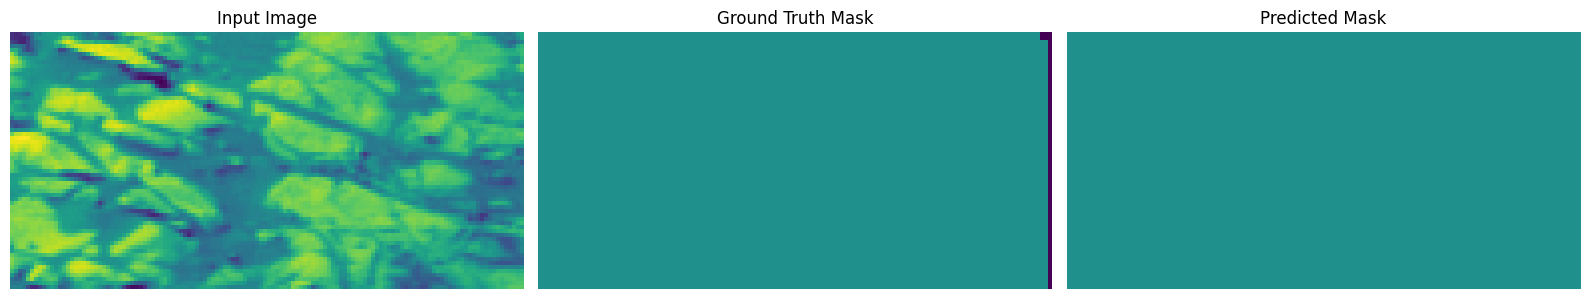

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 764ms/step - loss: 0.0730 - mean_iou: 0.5698 - val_loss: 0.1126 - val_mean_iou: 0.6764 - learning_rate: 4.0000e-05
Epoch 102/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0695 - mean_iou: 0.5930 - val_loss: 0.1172 - val_mean_iou: 0.6734 - learning_rate: 4.0000e-05
Epoch 103/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0636 - mean_iou: 0.6697 - val_loss: 0.1135 - val_mean_iou: 0.6752 - learning_rate: 4.0000e-05
Epoch 104/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0648 - mean_iou: 0.6827 - val_loss: 0.1139 - val_mean_iou: 0.6686 - learning_rate: 4.0000e-05
Epoch 105/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - loss: 0.0617 - mean_iou: 0.6460
Epoch 105: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 744ms/step - loss: 0.0617 - mean_iou: 0.6428 - val_loss: 0.1201 - val_mean_iou: 0.6590 - learning_rate: 4.0000e-05
Epoch 106/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss

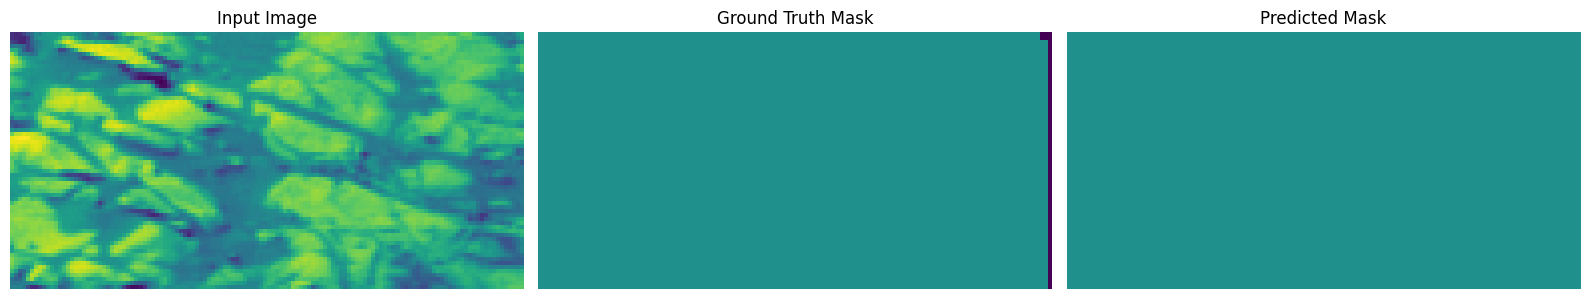

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 764ms/step - loss: 0.0638 - mean_iou: 0.6258 - val_loss: 0.1181 - val_mean_iou: 0.6618 - learning_rate: 8.0000e-06
Epoch 107/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0646 - mean_iou: 0.7221 - val_loss: 0.1150 - val_mean_iou: 0.6678 - learning_rate: 8.0000e-06
Epoch 108/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0656 - mean_iou: 0.7177 - val_loss: 0.1153 - val_mean_iou: 0.6703 - learning_rate: 8.0000e-06
Epoch 109/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0617 - mean_iou: 0.7017 - val_loss: 0.1156 - val_mean_iou: 0.6704 - learning_rate: 8.0000e-06
Epoch 110/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - loss: 0.0634 - mean_iou: 0.6078 - val_loss: 0.1154 - val_mean_iou: 0.6721 - learning_rate: 8.0000e-06
Epoch 111/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - loss: 0.0619 - mean_iou: 0.7494

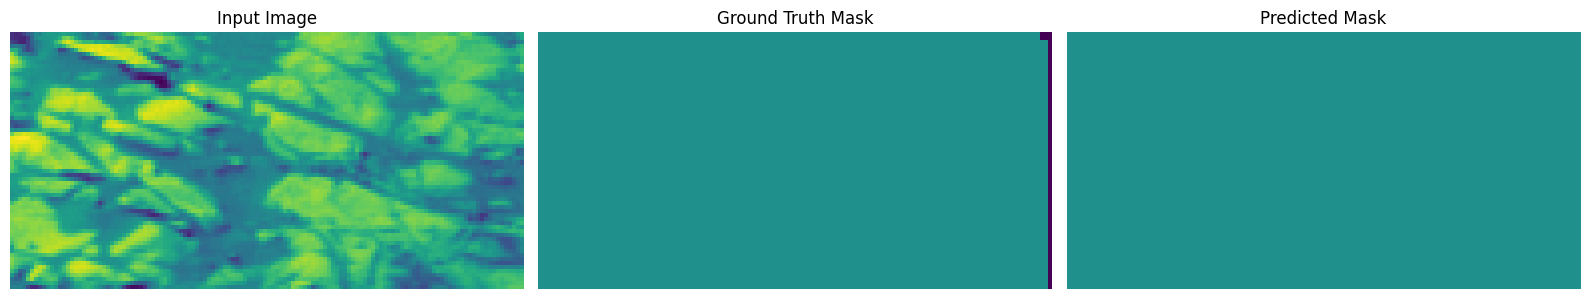

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 768ms/step - loss: 0.0619 - mean_iou: 0.7492 - val_loss: 0.1142 - val_mean_iou: 0.6739 - learning_rate: 8.0000e-06
Epoch 112/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - loss: 0.0673 - mean_iou: 0.7119 - val_loss: 0.1130 - val_mean_iou: 0.6759 - learning_rate: 8.0000e-06
Epoch 113/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - loss: 0.0693 - mean_iou: 0.7170 - val_loss: 0.1121 - val_mean_iou: 0.6764 - learning_rate: 8.0000e-06
Epoch 114/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0664 - mean_iou: 0.7076 - val_loss: 0.1116 - val_mean_iou: 0.6751 - learning_rate: 8.0000e-06
Epoch 115/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - loss: 0.0657 - mean_iou: 0.7421
Epoch 115: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 744ms/step - loss: 0.0659 - mean_iou: 0.7414 - val_loss: 0.1121 - val_mean_iou: 0.6740 - learning_rate: 8.0000e-06
Epoch 116/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - los

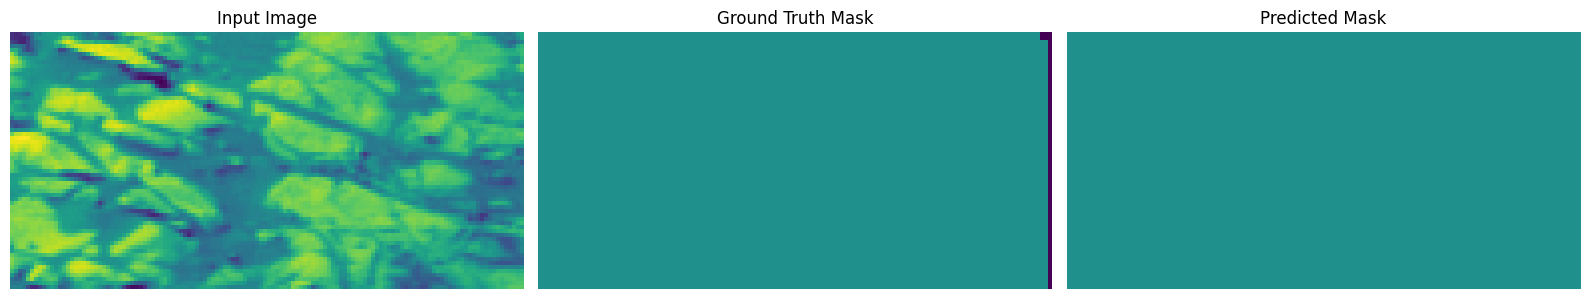

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 787ms/step - loss: 0.0685 - mean_iou: 0.5922 - val_loss: 0.1123 - val_mean_iou: 0.6734 - learning_rate: 1.6000e-06
Epoch 117/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0749 - mean_iou: 0.6718 - val_loss: 0.1128 - val_mean_iou: 0.6730 - learning_rate: 1.6000e-06
Epoch 118/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0653 - mean_iou: 0.6527 - val_loss: 0.1130 - val_mean_iou: 0.6732 - learning_rate: 1.6000e-06
Epoch 119/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0648 - mean_iou: 0.7299 - val_loss: 0.1132 - val_mean_iou: 0.6732 - learning_rate: 1.6000e-06
Epoch 120/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0623 - mean_iou: 0.7234 - val_loss: 0.1132 - val_mean_iou: 0.6743 - learning_rate: 1.6000e-06
Epoch 121/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - loss: 0.0708 - mean_iou: 0.6847

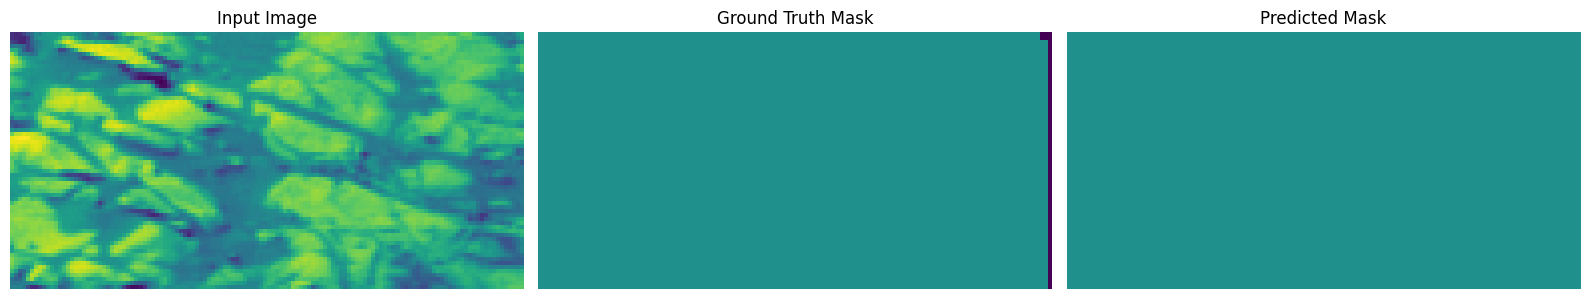

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 765ms/step - loss: 0.0705 - mean_iou: 0.6802 - val_loss: 0.1132 - val_mean_iou: 0.6746 - learning_rate: 1.6000e-06
Epoch 122/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0651 - mean_iou: 0.7379 - val_loss: 0.1132 - val_mean_iou: 0.6741 - learning_rate: 1.6000e-06
Epoch 123/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0683 - mean_iou: 0.7156 - val_loss: 0.1132 - val_mean_iou: 0.6742 - learning_rate: 1.6000e-06
Epoch 124/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - loss: 0.0641 - mean_iou: 0.7529 - val_loss: 0.1136 - val_mean_iou: 0.6738 - learning_rate: 1.6000e-06
Epoch 125/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - loss: 0.0646 - mean_iou: 0.7203
Epoch 125: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 0.0647 - mean_iou: 0.7205 - val_loss: 0.1137 - val_mean_iou: 0.6732 - learning_rate: 1.6000e-06


In [33]:
history = model.fit(train_gen, 
                    validation_data=(X_valid, y_valid),
                    epochs=500, 
                    callbacks=callbacks)

In [34]:
timestep_str = datetime.now().strftime("%y%m%d_%H%M%S")
model_filename = f"model_{timestep_str}.keras"
model.save(model_filename)
del model

print(f"Model saved to {model_filename}")

Model saved to model_241212_222105.keras


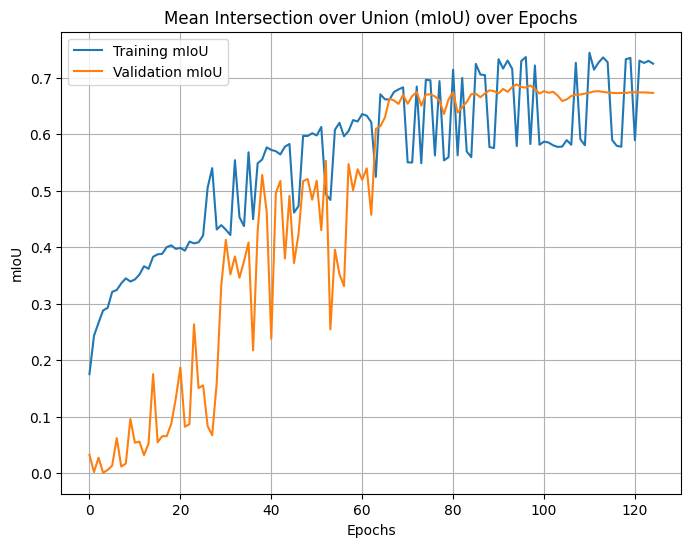

In [36]:
train_miou = history.history['mean_iou']
val_miou = history.history['val_mean_iou']

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_miou, label='Training mIoU')
plt.plot(val_miou, label='Validation mIoU')
plt.title('Mean Intersection over Union (mIoU) over Epochs')
plt.xlabel('Epochs')
plt.ylabel('mIoU')
plt.legend()
plt.grid()
plt.show()

## 📊 Prepare Your Submission

In our Kaggle competition, submissions are made as `csv` files. To create a proper `csv` file, you need to flatten your predictions and include an `id` column as the first column of your dataframe. To maintain consistency between your results and our solution, please avoid shuffling the test set. The code below demonstrates how to prepare the `csv` file from your model predictions.



In [37]:
# If model_filename is not defined, load the most recent model from Google Drive
if "model_filename" not in globals() or model_filename is None:
    files = [f for f in os.listdir('.') if os.path.isfile(f) and f.startswith('model_') and f.endswith('.keras')]
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    if files:
        model_filename = files[0]
    else:
        raise FileNotFoundError("No model files found in the current directory.")

In [38]:
custom_objects = {
    "custom_loss": custom_loss,
    "MeanIntersectionOverUnion": MeanIntersectionOverUnion
}
model = tfk.models.load_model(model_filename, custom_objects=custom_objects)
print(f"Model loaded from {model_filename}")

Model loaded from model_241212_222105.keras


In [39]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)
print(f"Predictions shape: {preds.shape}")

314/314 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step
Predictions shape: (10022, 64, 128)


In [40]:
def y_to_df(y) -> pd.DataFrame:
    """Converts segmentation predictions into a DataFrame format for Kaggle."""
    n_samples = len(y)
    y_flat = y.reshape(n_samples, -1)
    df = pd.DataFrame(y_flat)
    df["id"] = np.arange(n_samples)
    cols = ["id"] + [col for col in df.columns if col != "id"]
    return df[cols]

In [41]:
# Create and download the csv submission file
timestep_str = model_filename.replace("model_", "").replace(".keras", "")
submission_filename = f"submission_{timestep_str}.csv"
submission_df = y_to_df(preds)
submission_df.to_csv(submission_filename, index=False)

#  
<img src="https://airlab.deib.polimi.it/wp-content/uploads/2019/07/airlab-logo-new_cropped.png" width="350">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/800px-Instagram_logo_2022.svg.png" width="15"> **Instagram:** https://www.instagram.com/airlab_polimi/

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/LinkedIn_icon.svg/2048px-LinkedIn_icon.svg.png" width="15"> **LinkedIn:** https://www.linkedin.com/company/airlab-polimi/
___
Credits: Alberto Archetti 📧 alberto.archetti@polito.it





```
   Copyright 2024 Alberto Archetti

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```